In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
import tqdm


/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishanu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [49]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
# Open the image form working directory
num_train_samples=34
from tqdm import tqdm

def getData(num_train_samples=1000,FILEPATHS=['../../datasets/med_MNIST/AbdomenCT/*jpeg',
                       '../../datasets/med_MNIST/HeadCT/*jpeg',
                       '../../datasets/med_MNIST/ChestCT/*jpeg']):
    FILES={}
    count=0
    for i in FILEPATHS:
        FILES[count]=glob.glob(i)
        count=count+1
        
    NUM_CLASSES=len(FILEPATHS)
    ar_tr = np.zeros([num_train_samples*NUM_CLASSES,64, 64, 3], dtype=np.uint8)
    label_tr=np.empty((num_train_samples*NUM_CLASSES,), dtype='uint8')
    ar_ts = np.zeros([num_train_samples*NUM_CLASSES,64, 64, 3], dtype=np.uint8)
    label_ts=np.empty((num_train_samples*NUM_CLASSES,), dtype='uint8')
    count=0
    for f in tqdm(FILES[0]):
        #print('XX',count)
        image = Image.open(f)
        if count <num_train_samples:
            data = asarray(image)
            ar_tr[count,:,:,1]=data
            ar_tr[count,:,:,2]=data
            ar_tr[count,:,:,0]=data
            label_tr[count]=0
        if count>=num_train_samples:
            data = asarray(image)
            ar_ts[count-num_train_samples,:,:,1]=data
            ar_ts[count-num_train_samples,:,:,2]=data
            ar_ts[count-num_train_samples,:,:,0]=data
            label_ts[count-num_train_samples]=0
        count=count+1
        if count==num_train_samples*2:
            break


    count=0
    for f in tqdm(FILES[1]):
        #print('XXX',count)
        image = Image.open(f)
        if count <num_train_samples:
            data = asarray(image)
            ar_tr[count+num_train_samples,:,:,1]=data
            ar_tr[count+num_train_samples,:,:,2]=data
            ar_tr[count+num_train_samples,:,:,0]=data
            label_tr[count+num_train_samples]=1
        if count>=num_train_samples:
            data = asarray(image)
            #print(count)
            ar_ts[count,:,:,1]=data
            ar_ts[count,:,:,2]=data
            ar_ts[count,:,:,0]=data
            label_ts[count]=1
        count=count+1
        if count==num_train_samples*2:
            break

    count=0
    for f in tqdm(FILES[2]):
        #print('XXX',count)
        image = Image.open(f)
        if count <num_train_samples:
            data = asarray(image)
            ar_tr[count+2*num_train_samples,:,:,1]=data
            ar_tr[count+2*num_train_samples,:,:,2]=data
            ar_tr[count+2*num_train_samples,:,:,0]=data
            label_tr[count+2*num_train_samples]=2
        if count>=num_train_samples:
            data = asarray(image)
            #print(count)
            ar_ts[count+num_train_samples,:,:,1]=data
            ar_ts[count+num_train_samples,:,:,2]=data
            ar_ts[count+num_train_samples,:,:,0]=data
            label_ts[count+num_train_samples]=2
        count=count+1
        if count==num_train_samples*2:
            break
            
            
    x_train=ar_tr
    x_test=ar_ts
    y_train=label_tr
    y_test=label_ts
    return (x_train, y_train), (x_test, y_test)

In [50]:
(train_images, train_labels), (test_images, test_labels)=getData(num_train_samples)

  1%|          | 67/10000 [00:00<00:02, 4062.43it/s]


In [51]:
print(train_images.shape,len(train_labels))
print(test_images.shape,len(test_labels))


(102, 64, 64, 3) 102
(102, 64, 64, 3) 102


In [52]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

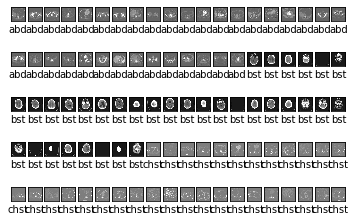

In [53]:
class_names = ['abd','bst','chst']

for i in range(100):
    plt.subplot(5,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])

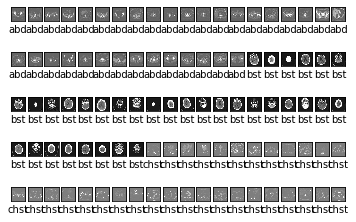

In [54]:
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i]])

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [62]:
#model.summary()


In [69]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3,activation=tf.nn.softmax))

In [70]:
model.summary()

W0305 12:53:32.412437 139852941567488 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 102 samples, validate on 102 samples


102/102 - 0s - loss: 0.8849 - acc: 0.6667


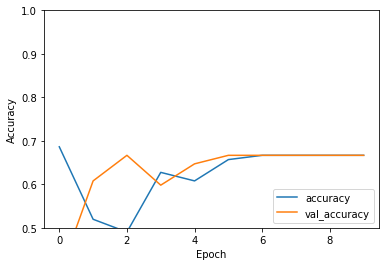

In [67]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [68]:
history.history

{'loss': [0.8469818433125814,
  1.0102735617581535,
  1.038659553901822,
  0.9135461379499996,
  0.9301923653658699,
  0.8990381558736166,
  0.8906057395187079,
  0.8860286392417609,
  0.8851208137530907,
  0.8849308514127544],
 'acc': [0.6862745,
  0.51960784,
  0.49019608,
  0.627451,
  0.60784316,
  0.65686274,
  0.6666667,
  0.6666667,
  0.6666667,
  0.6666667],
 'val_loss': [1.1256883939107258,
  0.9548784435964098,
  0.8896969743803436,
  0.9549026138642255,
  0.9003892529244516,
  0.8902256488800049,
  0.8869092020333982,
  0.885211120633518,
  0.8849567724209205,
  0.8848870326490963],
 'val_acc': [0.39215687,
  0.60784316,
  0.6666667,
  0.5980392,
  0.64705884,
  0.6666667,
  0.6666667,
  0.6666667,
  0.6666667,
  0.6666667]}